In [1]:
# reference: https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle/notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import pickle
f = open("data/author_sentence.pickle","rb")
df = pickle.load(f)
f.close()
train = df
train.head()

,sentence,author
0,EUGENIE GRANDET By Honore De Balzac Translate...,"Balzac, Honoré de"
1,"May your name, that of one whose portrait is t...","Balzac, Honoré de"
2,De Balzac.,"Balzac, Honoré de"
3,EUGENIE GRANDET I There are houses in certain ...,"Balzac, Honoré de"
4,"Within these houses there is, perhaps, the sil...","Balzac, Honoré de"


In [3]:
train = train.sample(int(len(train) / 10))

### Basic Exploratory Data Analysis (EDA)

In [4]:
train['author'].value_counts()

Shakespeare, William                   17627
Parker, Gilbert                        17582
Alger, Horatio, Jr.                    13346
Fenn, George Manville                  12591
Meredith, George                       10737
Dickens, Charles                        8769
Twain, Mark                             8753
Kingston, William Henry Giles           8660
Jacobs, W. W. (William Wymark)          8431
Balzac, Honoré de                       8409
Stevenson, Robert Louis                 8365
Oliphant, Mrs. (Margaret)               8207
Ballantyne, R. M. (Robert Michael)      8170
Henty, G. A. (George Alfred)            8154
Ebers, Georg                            8026
Lytton, Edward Bulwer Lytton, Baron     7800
Howells, William Dean                   7710
Hawthorne, Nathaniel                    7130
Motley, John Lothrop                    6470
Pepys, Samuel                           5547
Name: author, dtype: int64

In [5]:
# Reanme
train.rename(columns = {'sentence':'text'}, inplace = True) 
train

,text,author
1024267,"Abner always seemed so straight.” “Oh, he slop...","Parker, Gilbert"
628717,The terrible events of the last two days had m...,"Dickens, Charles"
100674,I found them on a tree.,"Shakespeare, William"
1323015,what a wonderful incomprehensible mistake!,"Oliphant, Mrs. (Margaret)"
1828939,The heart of Miles gave a bound such as it had...,"Ballantyne, R. M. (Robert Michael)"
...,...,...
1713317,"""Thank you, thank you.","Fenn, George Manville"
1339034,"The fact is, I'm too old to change so radically.","Howells, William Dean"
533199,There was no call for tears.,"Twain, Mark"
426122,or I shall think the world has indeed corrupte...,"Lytton, Edward Bulwer Lytton, Baron"


## Data Preprocessing

### Removing all notations

In [6]:
import re
def data_clearing_combined(text):
    
    regex = r'([0-9~`!@#$%^&*()\-_=+\[\]{};:\'",.<>?\/\\“”‘’|「」【】¥])'
    result = re.compile(regex)
    return result.sub(r'',text)
                                  
# Clear training Text
train['text'] = train['text'].apply(lambda x : data_clearing_combined(str(x)))
train['text']

1024267    Abner always seemed so straight Oh he sloped w...
628717     The terrible events of the last two days had m...
100674                                I found them on a tree
1323015            what a wonderful incomprehensible mistake
1828939    The heart of Miles gave a bound such as it had...
                                 ...                        
1713317                                  Thank you thank you
1339034        The fact is Im too old to change so radically
533199                           There was no call for tears
426122     or I shall think the world has indeed corrupte...
282508     Mrs Hunt coming to see my wife by chance dined...
Name: text, Length: 190484, dtype: object

### Removing short text length

In [7]:
max_length = train['text'].map(len).max()
max_length

4386

In [8]:
text_len_freq = []

for index in range(max_length + 1):
    text_len_freq.append(0)

for text in train['text']:
    text_len_freq[len(text)] += 1

text_len_freq = pd.DataFrame(text_len_freq).rename(columns={0:'frequency'})
text_len_freq

,frequency
0,1032
1,236
2,1611
3,1015
4,1492
...,...
4382,0
4383,0
4384,0
4385,0


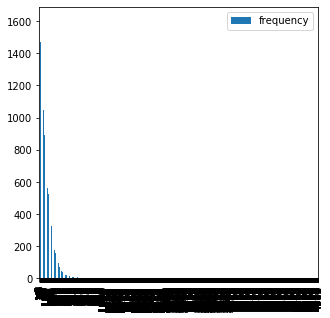

In [9]:
# text_len_freq.plot.bar(figsize=(5,5))

In [10]:
length = 50
text_len_freq = []

for index in range(length + 1):
    text_len_freq.append(0)

for text in train['text']:
    if len(text) <= length:
        text_len_freq[len(text)] += 1

text_len_freq = pd.DataFrame(text_len_freq).rename(columns={0:'frequency'})
# text_len_freq 

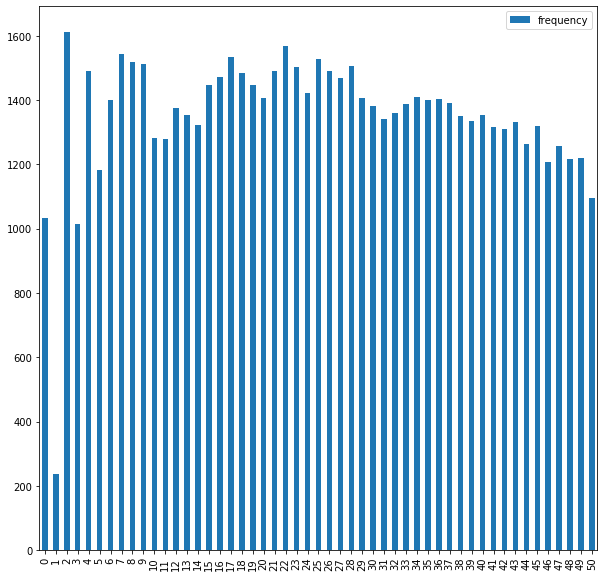

In [11]:
text_len_freq.plot.bar(figsize=(10,10))

In [12]:
length = 100

# Drop outlines
print("Data size before removing outlines: ", len(train))
indexNames = []
for key in train['text'].keys():
    if len(train['text'][key]) <= length:
        indexNames.append(key)
train.drop(indexNames , inplace=True)
print("Data size after removing outlines: ", len(train))

Data size before removing outlines:  190484
Data size after removing outlines:  74624


### Sampling for author Pepys Samuel

In [13]:
Pepys_Samuel = train[ train['author'] == 'Pepys, Samuel' ]
Pepys_Samuel

,text,author
312860,One of these boys is the son of a Montagu of m...,"Pepys, Samuel"
262460,Which is very observable the French were at le...,"Pepys, Samuel"
308316,Thence Creed and I to Alderman Backewells abou...,"Pepys, Samuel"
313017,Sir Thomas Crew yesterday speaking of the King...,"Pepys, Samuel"
288593,I answered him sharply that I did not make nor...,"Pepys, Samuel"
...,...,...
275213,Here was Mr Herbert son to Sir Charles Herbert...,"Pepys, Samuel"
302334,Up and by coach to Sir W Coventry where with h...,"Pepys, Samuel"
273096,So I went ashore at Westminster and to the Hal...,"Pepys, Samuel"
289677,Here I saw on a post an invitation to all good...,"Pepys, Samuel"


In [14]:
Pepys_Samuel_text = []
Pepys_Samuel_text.append(" ".join(Pepys_Samuel['text']))
# Pepys_Samuel_text

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop_word = set(stopwords.words('english')) 

#instantiate CountVectorizer()
cv = CountVectorizer(stop_words=stop_word)
 
# this steps generates word counts for the words in your docs
word_count_vector = cv.fit_transform(Pepys_Samuel_text)
word_count_vector

<1x8982 sparse matrix of type '<class 'numpy.int64'>'
	with 8982 stored elements in Compressed Sparse Row format>

In [16]:
# print TF-IDF values
df = pd.DataFrame(word_count_vector.T.todense(), index=cv.get_feature_names(), columns=["TF-IDF"])

# sort descending
df = df.sort_values(by=["TF-IDF"], ascending=False)
df = df[df['TF-IDF'] > 0]
df.head(20)

,TF-IDF
home,973
sir,843
mr,745
wife,676
lord,647
great,609
office,580
dinner,521
business,510
good,505


### Sampling of TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
    
vectorizer = TfidfVectorizer(use_idf=1,stop_words=stop_word)
vectorizer.fit(train['text'])
X_tfidf = vectorizer.transform(Pepys_Samuel_text)

In [18]:
X_tfidf

<1x74479 sparse matrix of type '<class 'numpy.float64'>'
	with 8982 stored elements in Compressed Sparse Row format>

In [19]:
X_tfidf_sample = X_tfidf
X_tfidf_sample = pd.DataFrame(X_tfidf_sample.T.todense(), index=vectorizer.get_feature_names(), columns=['TF-IDF'])

# Sort TF-IDF by descending
X_tfidf_sample = X_tfidf_sample.sort_values(by=["TF-IDF"],ascending=False)

# Drop TF-IDF value less than 0
X_tfidf_sample = X_tfidf_sample[X_tfidf_sample['TF-IDF'] > 0]
X_tfidf_sample

,TF-IDF
home,0.257045
sir,0.226735
wife,0.188113
lord,0.185284
office,0.182264
...,...
across,0.000338
miss,0.000329
air,0.000318
dont,0.000293


In [20]:
X_tfidf = vectorizer.transform(train['text'])

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
author_encoded = le.fit_transform(train['author'])
len(le.classes_)

20

### Removing low-variance features 

In [21]:
from sklearn.feature_selection import VarianceThreshold

# varThreshold = VarianceThreshold()
# X_tfidf_var = varThreshold.fit_transform(X_tfidf)
# X_test_var = varThreshold.transform(test)

### Feature Selection based on F-Score

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif
k_value = int(X_tfidf.shape[1] * 0.35)

k_feature = SelectKBest(f_classif, k=k_value)
X_tfidf_final = k_feature.fit_transform(X_tfidf, author_encoded)


### Split training and testing Data

In [63]:
# X_tfidf.shape

In [64]:
from sklearn.model_selection import train_test_split

X = X_tfidf_final
Y = author_encoded

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y)


In [65]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(67161, 26067)
(7463, 26067)
(67161,)
(7463,)


### Basic Naive Bayes

In [66]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [67]:
from sklearn.metrics import accuracy_score

def evaluate(predictions, Y_test):
    log_loss = multiclass_logloss(Y_test, predictions)
    accuracy = accuracy_score(predictions.argmax(axis=1), Y_test)
    print("Logloss: %0.3f " % log_loss)
    print("Accuracy: %0.3f " % accuracy)
    
    return log_loss, accuracy

In [68]:
from sklearn.naive_bayes import MultinomialNB

# Basic Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, Y_train)
predict = model.predict_proba(X_test)


In [69]:
# Evaluate Basic Naive Bayes on TF-IDF
basic_Naive_Bayes_logloss, basic_Naive_Bayes_accuracy = evaluate(predict, Y_test)

Logloss: 2.077 
Accuracy: 0.505 


### Grid Search

In [70]:
# # Reference: https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html

# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from pprint import pprint
# from time import time

# X_train, X_test, Y_train, Y_test = train_test_split(train['text'], Y, random_state=255, test_size=0.1, shuffle=True, stratify=Y)

# data = pd.DataFrame(train['text'])

# # Define a pipeline combining a text feature extractor with a simple
# # classifier
# pipeline = Pipeline([
# #     ('vect', CountVectorizer()),
#     ('tfidf', TfidfVectorizer()),
#     ('clf', MultinomialNB()),
# ])

# # uncommenting more parameters will give better exploring power but will
# # increase processing time in a combinatorial way
# parameters = {
#     'tfidf__analyzer': ('word', 'char', 'char_wb'),
#     'tfidf__use_idf': [True],
#     'tfidf__norm': ('l1', 'l2'),
#     'tfidf__min_df': (1,2,3),
#     'tfidf__smooth_idf': (True, False),
#     'tfidf__stop_words': stop_word,
#     'tfidf__sublinear_tf': (True, False),
#     'clf__alpha': (0.01, 0.1, 1),
# }

# # find the best parameters for both the feature extraction and the
# # classifier
# grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, verbose=1)

# print("Performing grid search...")
# print("pipeline:", [name for name, _ in pipeline.steps])
# print("parameters:")
# pprint(parameters)
# t0 = time()
# grid_search.fit(X_train, Y_train)
# print("done in %0.3fs" % (time() - t0))
# print()

# print("Best score: %0.3f" % grid_search.best_score_)
# print("Best parameters set:")
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))

### Naive Bayes after Grid Search

In [123]:
vectorizer = TfidfVectorizer(stop_words=stop_word, use_idf=True)
vectorizer.fit(train['text'])
X_tfidf = vectorizer.transform(train['text'])

In [124]:
k_value = int(X_tfidf.shape[1] * 0.35)

k_feature = SelectKBest(f_classif, k=k_value)
X_tfidf_final = k_feature.fit_transform(X_tfidf, author_encoded)

In [125]:
X = X_tfidf_final
Y = author_encoded

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y)

In [133]:
model = MultinomialNB(alpha= 0.1)
model.fit(X_train, Y_train)
predict = model.predict_proba(X_test)

In [134]:
# Evaluate Basic Naive Bayes on TF-IDF
basic_Naive_Bayes_logloss, basic_Naive_Bayes_accuracy = evaluate(predict, Y_test)

Logloss: 1.560 
Accuracy: 0.622 
